
# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
---

<p style="text-align: center;">
<img src=http://www2.famaf.unc.edu.ar/~efernandez/egeo/img/logos/famaf.jpg width=40%>
</p>

 Universidad Nacional de Córdoba

---

## Practico: Aprendizaje No Supervisado

### Importación de librerías 

In [43]:
import pandas as pd 
import numpy as np
import warnings
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

### Lectura del dataset

In [2]:
df_orig = pd.read_parquet("preprocesado_no_supervisado.parquet")

In [3]:
df = df_orig.copy()

In [4]:
df.isnull().values.any()

False

In [5]:
df = df.drop(columns = ['anio_mes_cupon', 'client_edad', 'client_domicilio_codigo_postal'])

In [6]:
df.columns

Index(['dni_titular_movimiento', 'client_antig', 'trans__x0_AV',
       'trans__x0_AX', 'trans__x0_EX', 'trans__x0_MC', 'trans__x0_PC',
       'trans__x0_PL', 'trans__x0_PN', 'trans__x0_PP', 'trans__x0_SM',
       'trans__x0_TA', 'trans__x0_VI', 'trans__x0_ZE',
       'trans__x1_American_express', 'trans__x1_Clasica',
       'trans__x1_Master_internacional', 'trans__x1_Naranja',
       'trans__x1_Naranja_virtual', 'trans__x1_Visa_internacional',
       'trans__x2_Dolares', 'trans__x2_Pesos', 'trans__x2_Zeta', 'trans__x3_0',
       'trans__x3_1', 'trans__x3_2', 'trans__x3_3', 'trans__x3_4',
       'trans__x3_5', 'trans__x3_6', 'trans__x3_7', 'trans__x3_8',
       'trans__x3_9', 'monto_ajustado', 'fg_aumentado', 'o_mes', 'mean_cargo',
       'mean_sexo', 'mean_est_civil', 'mean_reg', 'mean_nivel_estud',
       'mean_est_viv', 'mean_edad', 'geodist_cp'],
      dtype='object')

### Normalización de Atributos y PCA

In [7]:
# Preprocessing
features = df.columns
dni = 'dni_titular_movimiento'
target = 'fg_aumentado'

features = features[(features != dni) & (features != target)]
features = [g for g in features if 'mean_' not in g]

In [8]:
len(features)

35

In [9]:
#pca = PCA(n_components=min(20, df.shape[1]))
scaler = StandardScaler()
pca = PCA(n_components=None)

In [10]:
# Fit
model = Pipeline([
  ('scaler', scaler),
  ('pca', pca),
])

pca_result = model.fit_transform(df[features])

In [11]:
pca_result.shape

(10128, 35)

In [12]:
model['pca'].explained_variance_ratio_.round(2)

array([0.2 , 0.08, 0.06, 0.05, 0.05, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

<AxesSubplot:title={'center':'Porcentaje de la varianza total de los datos, \n explicada por cada componente principal \n'}>

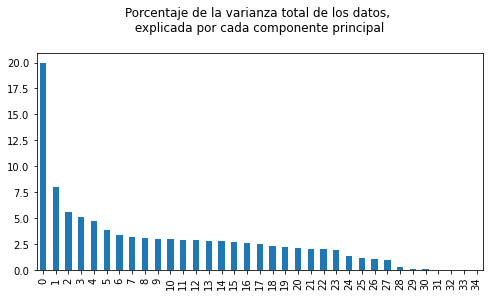

In [13]:
plt.figure(figsize=(8,4))
plt.title("Porcentaje de la varianza total de los datos, \n explicada por cada componente principal \n")
pd.Series(model['pca'].explained_variance_ratio_.round(6)*100).plot(kind='bar')

In [14]:
acc_variance_percent = np.cumsum(np.round(model['pca'].explained_variance_ratio_.round(2), decimals=4) * 100)
acc_variance_percent

array([ 20.,  28.,  34.,  39.,  44.,  48.,  51.,  54.,  57.,  60.,  63.,
        66.,  69.,  72.,  75.,  78.,  81.,  84.,  86.,  88.,  90.,  92.,
        94.,  96.,  97.,  98.,  99., 100., 100., 100., 100., 100., 100.,
       100., 100.])

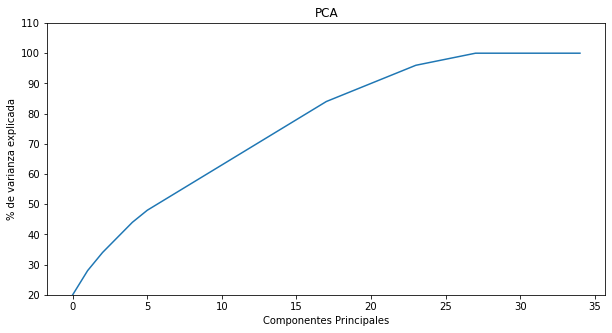

In [15]:
#plt.xticks(range(model['pca'].n_components))

plt.figure(figsize=(10, 5))
plt.ylabel('% de varianza explicada')
plt.xlabel('Componentes Principales')
plt.title('PCA')
plt.ylim(20, 110)
plt.xticks(model['pca'].n_components)
plt.plot(acc_variance_percent)

In [16]:
pca_cols = [f'pca_{x}' for x in range(1,16)]
df_pca_final = pd.DataFrame(pca_result[:,:15], columns = pca_cols)
df_pca_final

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15
0,-2.251472,0.051066,-0.148895,-0.513030,0.137907,-0.838896,0.569449,-0.069805,-0.372449,0.491298,-0.190473,0.395694,-0.479255,0.525277,-1.232101
1,-1.938524,-0.032021,-0.098414,-0.208088,0.050483,-0.814305,0.644480,-0.202690,-0.312881,0.377221,-0.131161,0.348705,-0.405433,0.485619,-1.045256
2,-1.954612,-0.032581,-0.105265,-0.228509,0.052203,-0.815702,0.671645,-0.308521,-0.310460,0.287787,-0.090107,0.270136,-0.337289,0.430836,-0.848046
3,-1.970699,-0.033141,-0.112116,-0.248930,0.053924,-0.817099,0.698811,-0.414352,-0.308040,0.198354,-0.049053,0.191567,-0.269144,0.376053,-0.650836
4,-1.986786,-0.033701,-0.118966,-0.269352,0.055644,-0.818496,0.725977,-0.520183,-0.305620,0.108920,-0.007999,0.112998,-0.201000,0.321270,-0.453627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,4.484611,-2.010828,-0.290988,-1.125179,0.316396,0.726857,-2.006629,1.199783,-0.281344,-0.138167,-1.026748,-0.645678,0.382897,-1.777583,1.211200
10124,1.460202,-0.699214,0.362882,1.876127,-0.467461,0.681828,-1.131671,0.074023,-0.091613,-0.228246,-0.164620,-0.251761,0.330254,-0.431663,0.711188
10125,0.501371,-0.254380,0.338478,2.094330,-0.552888,0.887358,-0.679694,-0.470107,0.460187,-0.466860,0.153968,-0.094724,0.287951,0.146841,0.756862
10126,-0.952168,-0.059282,-0.030280,0.122009,-0.148933,2.871914,0.329423,1.786381,0.789267,-6.917620,6.012313,15.594830,-0.411569,-5.096588,4.459485


In [17]:
cols = [x for x in df.columns if x not in features]
df_sin_pca = df[cols] 
df_sin_pca

,dni_titular_movimiento,fg_aumentado,mean_cargo,mean_sexo,mean_est_civil,mean_reg,mean_nivel_estud,mean_est_viv,mean_edad
0,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79
1,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79
2,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79
3,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79
4,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79
...,...,...,...,...,...,...,...,...,...
10123,000ef071e95351afc1149fa1afe4862a079,1,3.58,3.59,3.68,3.99,4.0,3.75,3.90
10124,000ef071e95351afc1149fa1afe4862a079,0,3.58,3.59,3.68,3.99,4.0,3.75,3.90
10125,000ef071e95351afc1149fa1afe4862a079,0,3.58,3.59,3.68,3.99,4.0,3.75,3.90
10126,000ef071e95351afc1149fa1afe4862a079,1,3.58,3.59,3.68,3.99,4.0,3.75,3.90


In [18]:
df_final = pd.merge(df_sin_pca, df_pca_final, left_index=True, right_index=True)
df_final

,dni_titular_movimiento,fg_aumentado,mean_cargo,mean_sexo,mean_est_civil,mean_reg,mean_nivel_estud,mean_est_viv,mean_edad,pca_1,...,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15
0,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-2.251472,...,-0.838896,0.569449,-0.069805,-0.372449,0.491298,-0.190473,0.395694,-0.479255,0.525277,-1.232101
1,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-1.938524,...,-0.814305,0.644480,-0.202690,-0.312881,0.377221,-0.131161,0.348705,-0.405433,0.485619,-1.045256
2,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-1.954612,...,-0.815702,0.671645,-0.308521,-0.310460,0.287787,-0.090107,0.270136,-0.337289,0.430836,-0.848046
3,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-1.970699,...,-0.817099,0.698811,-0.414352,-0.308040,0.198354,-0.049053,0.191567,-0.269144,0.376053,-0.650836
4,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-1.986786,...,-0.818496,0.725977,-0.520183,-0.305620,0.108920,-0.007999,0.112998,-0.201000,0.321270,-0.453627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,000ef071e95351afc1149fa1afe4862a079,1,3.58,3.59,3.68,3.99,4.0,3.75,3.90,4.484611,...,0.726857,-2.006629,1.199783,-0.281344,-0.138167,-1.026748,-0.645678,0.382897,-1.777583,1.211200
10124,000ef071e95351afc1149fa1afe4862a079,0,3.58,3.59,3.68,3.99,4.0,3.75,3.90,1.460202,...,0.681828,-1.131671,0.074023,-0.091613,-0.228246,-0.164620,-0.251761,0.330254,-0.431663,0.711188
10125,000ef071e95351afc1149fa1afe4862a079,0,3.58,3.59,3.68,3.99,4.0,3.75,3.90,0.501371,...,0.887358,-0.679694,-0.470107,0.460187,-0.466860,0.153968,-0.094724,0.287951,0.146841,0.756862
10126,000ef071e95351afc1149fa1afe4862a079,1,3.58,3.59,3.68,3.99,4.0,3.75,3.90,-0.952168,...,2.871914,0.329423,1.786381,0.789267,-6.917620,6.012313,15.594830,-0.411569,-5.096588,4.459485


In [19]:
df_final

,dni_titular_movimiento,fg_aumentado,mean_cargo,mean_sexo,mean_est_civil,mean_reg,mean_nivel_estud,mean_est_viv,mean_edad,pca_1,...,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15
0,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-2.251472,...,-0.838896,0.569449,-0.069805,-0.372449,0.491298,-0.190473,0.395694,-0.479255,0.525277,-1.232101
1,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-1.938524,...,-0.814305,0.644480,-0.202690,-0.312881,0.377221,-0.131161,0.348705,-0.405433,0.485619,-1.045256
2,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-1.954612,...,-0.815702,0.671645,-0.308521,-0.310460,0.287787,-0.090107,0.270136,-0.337289,0.430836,-0.848046
3,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-1.970699,...,-0.817099,0.698811,-0.414352,-0.308040,0.198354,-0.049053,0.191567,-0.269144,0.376053,-0.650836
4,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-1.986786,...,-0.818496,0.725977,-0.520183,-0.305620,0.108920,-0.007999,0.112998,-0.201000,0.321270,-0.453627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,000ef071e95351afc1149fa1afe4862a079,1,3.58,3.59,3.68,3.99,4.0,3.75,3.90,4.484611,...,0.726857,-2.006629,1.199783,-0.281344,-0.138167,-1.026748,-0.645678,0.382897,-1.777583,1.211200
10124,000ef071e95351afc1149fa1afe4862a079,0,3.58,3.59,3.68,3.99,4.0,3.75,3.90,1.460202,...,0.681828,-1.131671,0.074023,-0.091613,-0.228246,-0.164620,-0.251761,0.330254,-0.431663,0.711188
10125,000ef071e95351afc1149fa1afe4862a079,0,3.58,3.59,3.68,3.99,4.0,3.75,3.90,0.501371,...,0.887358,-0.679694,-0.470107,0.460187,-0.466860,0.153968,-0.094724,0.287951,0.146841,0.756862
10126,000ef071e95351afc1149fa1afe4862a079,1,3.58,3.59,3.68,3.99,4.0,3.75,3.90,-0.952168,...,2.871914,0.329423,1.786381,0.789267,-6.917620,6.012313,15.594830,-0.411569,-5.096588,4.459485


In [20]:
df_final.columns

Index(['dni_titular_movimiento', 'fg_aumentado', 'mean_cargo', 'mean_sexo',
       'mean_est_civil', 'mean_reg', 'mean_nivel_estud', 'mean_est_viv',
       'mean_edad', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6',
       'pca_7', 'pca_8', 'pca_9', 'pca_10', 'pca_11', 'pca_12', 'pca_13',
       'pca_14', 'pca_15'],
      dtype='object')

In [21]:
df.columns

Index(['dni_titular_movimiento', 'client_antig', 'trans__x0_AV',
       'trans__x0_AX', 'trans__x0_EX', 'trans__x0_MC', 'trans__x0_PC',
       'trans__x0_PL', 'trans__x0_PN', 'trans__x0_PP', 'trans__x0_SM',
       'trans__x0_TA', 'trans__x0_VI', 'trans__x0_ZE',
       'trans__x1_American_express', 'trans__x1_Clasica',
       'trans__x1_Master_internacional', 'trans__x1_Naranja',
       'trans__x1_Naranja_virtual', 'trans__x1_Visa_internacional',
       'trans__x2_Dolares', 'trans__x2_Pesos', 'trans__x2_Zeta', 'trans__x3_0',
       'trans__x3_1', 'trans__x3_2', 'trans__x3_3', 'trans__x3_4',
       'trans__x3_5', 'trans__x3_6', 'trans__x3_7', 'trans__x3_8',
       'trans__x3_9', 'monto_ajustado', 'fg_aumentado', 'o_mes', 'mean_cargo',
       'mean_sexo', 'mean_est_civil', 'mean_reg', 'mean_nivel_estud',
       'mean_est_viv', 'mean_edad', 'geodist_cp'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10128 entries, 0 to 10127
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   dni_titular_movimiento          10128 non-null  object 
 1   client_antig                    10128 non-null  float64
 2   trans__x0_AV                    10128 non-null  float64
 3   trans__x0_AX                    10128 non-null  float64
 4   trans__x0_EX                    10128 non-null  float64
 5   trans__x0_MC                    10128 non-null  float64
 6   trans__x0_PC                    10128 non-null  float64
 7   trans__x0_PL                    10128 non-null  float64
 8   trans__x0_PN                    10128 non-null  float64
 9   trans__x0_PP                    10128 non-null  float64
 10  trans__x0_SM                    10128 non-null  float64
 11  trans__x0_TA                    10128 non-null  float64
 12  trans__x0_VI                    

### Visualización mediante t-distributed Stochastic Neighbor Embedding

Visualizar los datos usando t-distributed Stochastic Neighbor Embedding.
* Se pueden sacar conclusiones del grafico?



In [95]:
df_tsne = df.drop(columns = [dni, target]) # Porque sacamos o_mes?

Instanciamos TSNE con los parametros que regularmente se usan

In [96]:
tsne = TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000, init='random') 

#### Todos los features transaccionales sin reducir

In [98]:
X_tsne_all = tsne.fit_transform(df_tsne)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10128 samples in 0.001s...
[t-SNE] Computed neighbors for 10128 samples in 3.787s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10128
[t-SNE] Computed conditional probabilities for sample 2000 / 10128
[t-SNE] Computed conditional probabilities for sample 3000 / 10128
[t-SNE] Computed conditional probabilities for sample 4000 / 10128
[t-SNE] Computed conditional probabilities for sample 5000 / 10128
[t-SNE] Computed conditional probabilities for sample 6000 / 10128
[t-SNE] Computed conditional probabilities for sample 7000 / 10128
[t-SNE] Computed conditional probabilities for sample 8000 / 10128
[t-SNE] Computed conditional probabilities for sample 9000 / 10128
[t-SNE] Computed conditional probabilities for sample 10000 / 10128
[t-SNE] Computed conditional probabilities for sample 10128 / 10128
[t-SNE] Mean sigma: 12.918810
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.755394
[t-SNE] KL

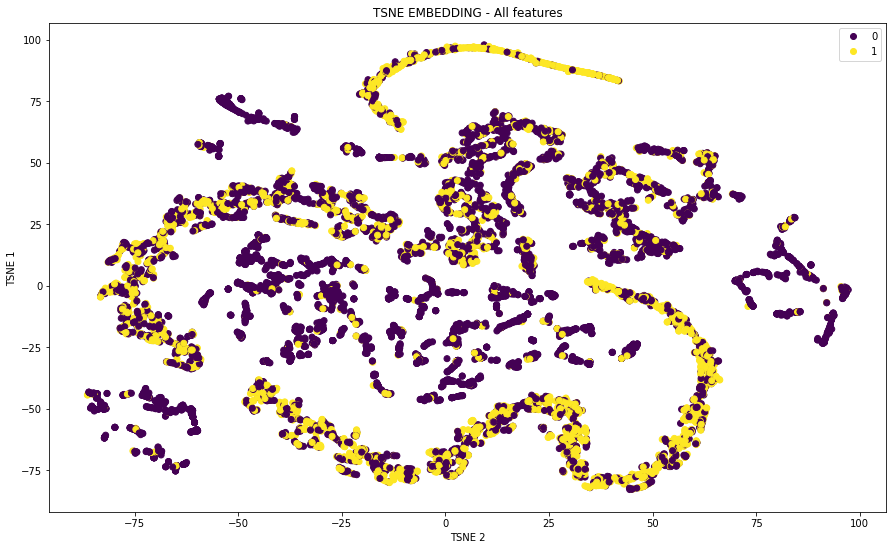

In [100]:
# Plot de resultado en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - All features')
scatter = plt.scatter(X_tsne_all[:,0], X_tsne_all[:,1], c=df_final['fg_aumentado'])
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, df_final['fg_aumentado'].unique())

El grafico anterior muestra el dataset reducido a dos variables sin una previa reduccion de dimensionalidad. En principio habria ciertos grupos identificables. Los grupos que graficamente se ven como 'mas alargados' tienen mayoritariamente puntos en 1, mientras que el resto de los grupos mas concentricos y trambien con mas dispersion, son mayoritariamente puntos en 0. 

Una idea que surge a partir de esta visualizacion, es que probablemente sea mejor usar un algoritmo de enlace para buscar clusters, para que encuentre las formas tanto alargadas como concentricas de los grupos.

#### TNSE: Reducidos PCA + mean encoded

In [89]:
X_tsne_all_redux = tsne.fit_transform(df_final.drop(columns=['dni_titular_movimiento', 'fg_aumentado']))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10128 samples in 0.001s...
[t-SNE] Computed neighbors for 10128 samples in 4.057s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10128
[t-SNE] Computed conditional probabilities for sample 2000 / 10128
[t-SNE] Computed conditional probabilities for sample 3000 / 10128
[t-SNE] Computed conditional probabilities for sample 4000 / 10128
[t-SNE] Computed conditional probabilities for sample 5000 / 10128
[t-SNE] Computed conditional probabilities for sample 6000 / 10128
[t-SNE] Computed conditional probabilities for sample 7000 / 10128
[t-SNE] Computed conditional probabilities for sample 8000 / 10128
[t-SNE] Computed conditional probabilities for sample 9000 / 10128
[t-SNE] Computed conditional probabilities for sample 10000 / 10128
[t-SNE] Computed conditional probabilities for sample 10128 / 10128
[t-SNE] Mean sigma: 0.380062
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.714409
[t-SNE] KL 

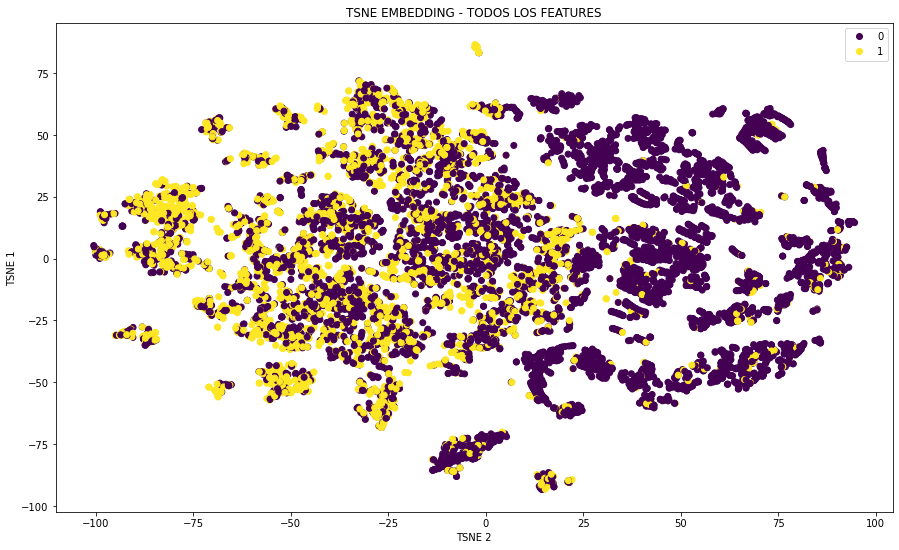

In [90]:
# Plot de resultado en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - PCA reduced + mean encoded')
scatter = plt.scatter(X_tsne_all_redux[:,0], X_tsne_all_redux[:,1], c=df_final['fg_aumentado'])
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, df_final['fg_aumentado'].unique())

La reduccion de dimensionalidad no permite establecer una relacion entre las distintas variables que explique el desplazamiento de los puntos amarillos de los violetas. Pero podemos estar seguros de que se pueden separar. A partir de 25 para TSNE_2 los puntos en 1 disminuyen mucho en cantidad. Hay una disminucion abrupta de puntos amarillos a partir de ese punto, y no es el caso de los puntos violetas, que se distribuyen en menor cantidad del lado izquierdo del grafico, sin embargo con presencia en todo el conjunto. 

Probamos ahora una visualizacion pero solo con las features que fueron codificadas usando mean encoding

#### Features con mean encoding

In [91]:
cols = ['mean_cargo','mean_sexo','mean_est_civil','mean_reg','mean_nivel_estud', 'mean_est_viv', 'mean_edad']
X_tsne_mean = tsne.fit_transform(df_final[cols])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10128 samples in 0.059s...
[t-SNE] Computed neighbors for 10128 samples in 0.495s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10128
[t-SNE] Computed conditional probabilities for sample 2000 / 10128
[t-SNE] Computed conditional probabilities for sample 3000 / 10128
[t-SNE] Computed conditional probabilities for sample 4000 / 10128
[t-SNE] Computed conditional probabilities for sample 5000 / 10128
[t-SNE] Computed conditional probabilities for sample 6000 / 10128
[t-SNE] Computed conditional probabilities for sample 7000 / 10128
[t-SNE] Computed conditional probabilities for sample 8000 / 10128
[t-SNE] Computed conditional probabilities for sample 9000 / 10128
[t-SNE] Computed conditional probabilities for sample 10000 / 10128
[t-SNE] Computed conditional probabilities for sample 10128 / 10128
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.761002
[t-SNE] KL 

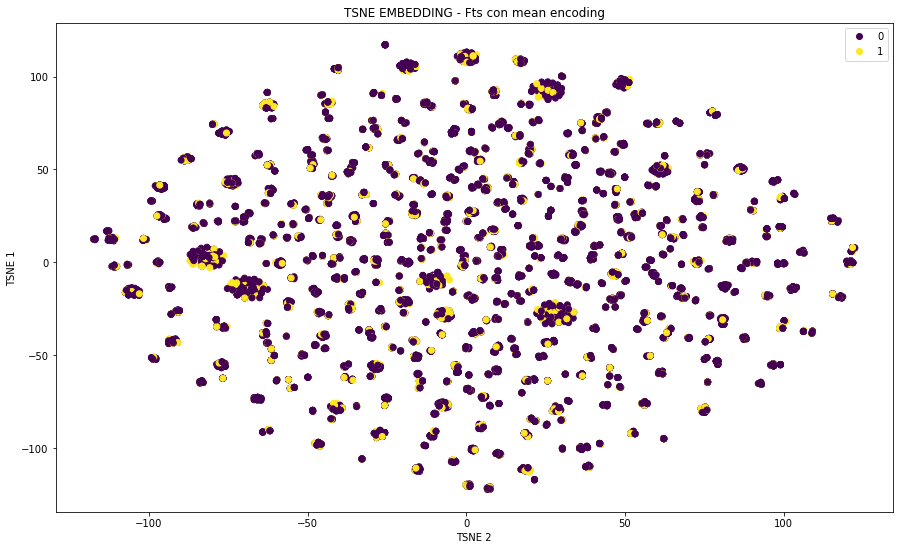

In [92]:
# Plot de resultado en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - Fts con mean encoding')
scatter = plt.scatter(X_tsne_mean[:,0], X_tsne_mean[:,1], c=df_final['fg_aumentado'])
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, df_final['fg_aumentado'].unique())

Aqui no hay una reduccion de dimensionalidad previa, sino que solo estan los features codificados. Si bien la distribucion de puntos parece uniforme y no es posible diferenciar aglomeraciones solo por color, si se pueden observar algunas agrupaciones aisladas de puntos con una mezcla aparentemente homogenea de casos en 0 y 1. Aunque podriamos encontrarle algun significado a estas agrupaciones, ya sabemos que el aumento de consumo no formaria parte de la condicion para que se armen de esa manera. 

#### Features PCA

In [93]:
cols = [x for x in df_final.columns if 'pca_' in x]
X_tsne_pca = tsne.fit_transform(df_final[cols])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10128 samples in 0.013s...
[t-SNE] Computed neighbors for 10128 samples in 2.002s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10128
[t-SNE] Computed conditional probabilities for sample 2000 / 10128
[t-SNE] Computed conditional probabilities for sample 3000 / 10128
[t-SNE] Computed conditional probabilities for sample 4000 / 10128
[t-SNE] Computed conditional probabilities for sample 5000 / 10128
[t-SNE] Computed conditional probabilities for sample 6000 / 10128
[t-SNE] Computed conditional probabilities for sample 7000 / 10128
[t-SNE] Computed conditional probabilities for sample 8000 / 10128
[t-SNE] Computed conditional probabilities for sample 9000 / 10128
[t-SNE] Computed conditional probabilities for sample 10000 / 10128
[t-SNE] Computed conditional probabilities for sample 10128 / 10128
[t-SNE] Mean sigma: 0.219012
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.301193
[t-SNE] KL 

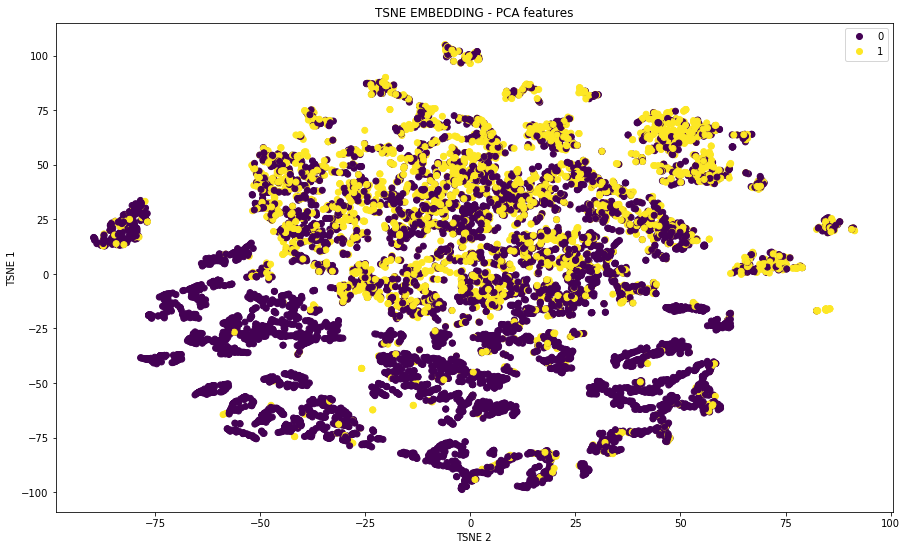

In [94]:
# Plot de resultado en 2 dimensiones
plt.figure(figsize=(15, 9))
plt.ylabel('TSNE 1')
plt.xlabel('TSNE 2')
plt.title('TSNE EMBEDDING - PCA features')
scatter = plt.scatter(X_tsne_pca[:,0], X_tsne_pca[:,1], c=df_final['fg_aumentado'])
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, df_final['fg_aumentado'].unique())

Usando solo los features de PCA, estariamos aplicando reduccion de dimensionalidad a un conjunto de features ya previamente reducido. La separacion de los datos esta condicionada por el proceso de PCA que diferencia las features segun su aporte de variabilidad de la informacion. Podemos asegurar que los datos son separables por la etiqueta propuesta, sin embargo a partir de este grafico solo no podemos determinar que variables son condicionantes para separarlos.

3. Optativo: Clustering Agglomerativos
Usar cluster aglomerativos para hacer clusterning de series temporales
usando el monto y la fecha del monto de moviento.
*  [hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)

### K-Means Clustering

K-Means Clustering
Explorar distintas soluciones de clustering con diferentes parámetros,
como iteraciones, número de clusters o métricas de distancia, y compararlas. 
Finalmente, para el modelo seleccionado:
> Aplicar K-Means tanto al dataset original como al dataset transformado.

* Calcular las métricas pertinentes sobre los clusters resultantes.
* Aplicando el método de Elbow, ¿cuál sería la cantidad óptima de clusters?
* Agregar al dataset el cluster resultante de los modelos.
* Graficar diferentes variables de interés por cluster y compararlos.

#### SOBRE DF CON PCA (TRANSFORMADO)

In [38]:
# Número de clusters buscado
n_clust = 6

km = KMeans(n_clusters=n_clust)
km.fit(df_final.drop(columns = [dni])) 

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster(Inertia) ', km.inertia_)

Suma de los cuadrados de las distancias al cluster(Inertia)  163130.41905931677


In [40]:
X = df_final.drop(columns = [dni]).values
print('Coeficiente de silueta =', silhouette_score(X, cluster_labels))

Coeficiente de silueta= 0.2516301596179416


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

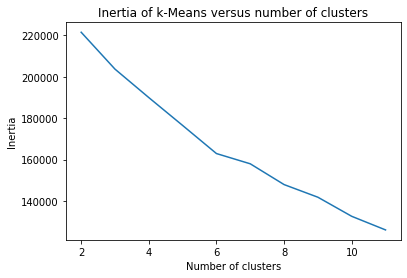

In [35]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_final.drop(columns = [dni])).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [36]:
df_clusters=df.copy()
df_clusters['cluster_kmeans'] = km.labels_ #clusters
df_clusters.cluster_kmeans.value_counts()

1    5021
2    3778
0    1027
3     284
4      15
5       3
Name: cluster_kmeans, dtype: int64

In [90]:
km.labels_

array([2, 2, 2, ..., 0, 0, 2])

In [37]:
pd.options.display.max_columns = None
df_clusters.groupby(by= 'cluster_kmeans').describe()

client_antig                                               \
                      count        mean        std    min     25%    50%   
cluster_kmeans                                                             
0                    1027.0  136.592989  83.219793    0.0   64.00  122.0   
1                    5021.0   95.548695  79.652967    0.0   33.00   74.0   
2                    3778.0  103.638698  75.035750    0.0   42.00   89.0   
3                     284.0  100.672535  69.193347    1.0   36.25   93.5   
4                      15.0   95.066667  35.439015   44.0   74.50  105.0   
5                       3.0  123.000000  19.974984  100.0  116.50  133.0   

                              trans__x0_AV                                     \
                   75%    max        count      mean       std  min  25%  50%   
cluster_kmeans                                                                  
0               197.00  308.0       1027.0  0.196689  0.400132  0.0  0.0  0.0   
1               142.00  392.0       5021.0  0.001792  0.042304  0.0  0.0  0.0   
2               151.00  390.0       3778.0  0.175225  0.382985  0.0  0.0  0.0   
3               166.25  281.0        284.0  0.116197  0.321027  0.0  0.0  0.0   
4               107.50  173.0         15.0  0.066667  0.258199  0.0  0.0  0.0   
5               134.50  136.0          3.0  0.000000  0.000000  0.0  0.0  0.0   

                         trans__x0_AX                                     \
                75%  max        count mean  std  min  25%  50%  75%  max   
cluster_kmeans                                                             
0               0.0  2.0       1027.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1               0.0  1.0       5021.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2               0.0  2.0       3778.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3               0.0  1.0        284.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4               0.0  1.0         15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5               0.0  0.0          3.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

               trans__x0_EX                                               \
                      count      mean       std  min  25%  50%  75%  max   
cluster_kmeans                                                             
0                    1027.0  0.021422  0.332644  0.0  0.0  0.0  0.0  8.0   
1                    5021.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
2                    3778.0  0.010058  0.244407  0.0  0.0  0.0  0.0  9.0   
3                     284.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
4                      15.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
5                       3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

               trans__x0_MC                                               \
                      count      mean       std  min  25%  50%  75%  max   
cluster_kmeans                                                             
0                    1027.0  0.037975  0.244867  0.0  0.0  0.0  0.0  3.0   
1                    5021.0  0.002191  0.050841  0.0  0.0  0.0  0.0  2.0   
2                    3778.0  0.011382  0.122318  0.0  0.0  0.0  0.0  3.0   
3                     284.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
4                      15.0  5.066667  2.186539  2.0  3.0  5.0  6.5  9.0   
5                       3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

               trans__x0_PC                                               \
                      count      mean       std  min  25%  50%  75%  max   
cluster_kmeans                                                             
0                    1027.0  0.261928  0.701253  0.0  0.0  0.0  0.0  6.0   
1                    5021.0  0.028879  0.211621  0.0  0.0  0.0  0.0  3.0   
2                    3778.0  0.169931  0.529986  0.0  0.0  0.0  0.0  4.0   
3                     284.0  0.183099  0.657866  0.0  0.0  0.0  0.0  3.0   
4            

Para n_clusters = 2 El silhouette_score promedio es : 0.33849088049750475
Para n_clusters = 3 El silhouette_score promedio es : 0.31033926195875094
Para n_clusters = 4 El silhouette_score promedio es : 0.2516301596179416
Para n_clusters = 5 El silhouette_score promedio es : 0.25281847793683265
Para n_clusters = 6 El silhouette_score promedio es : 0.25466763221842353


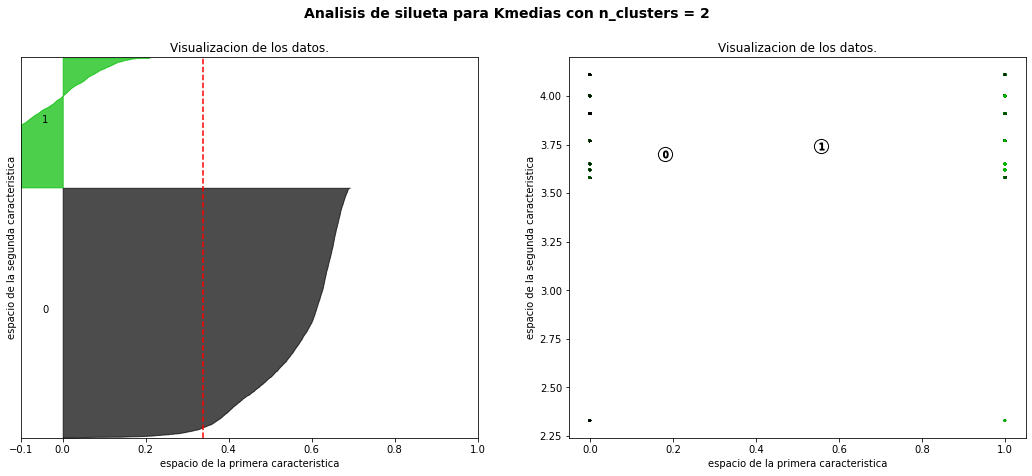

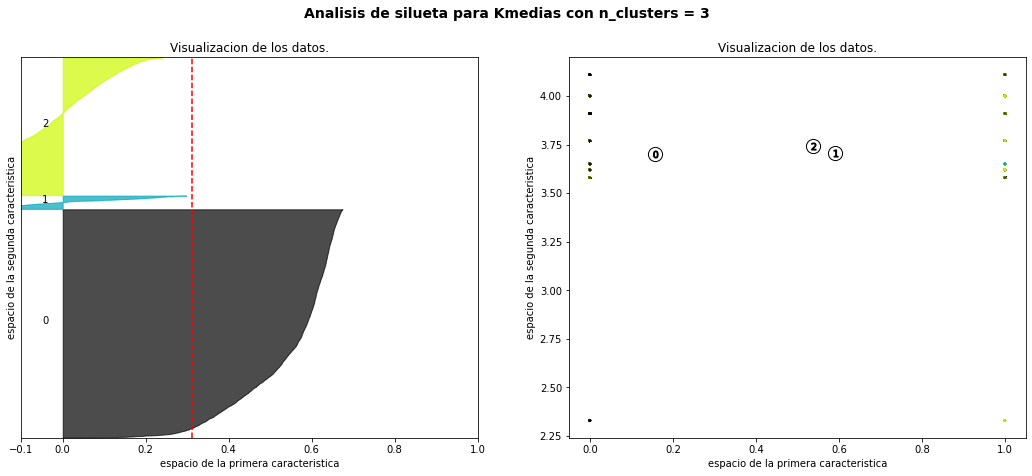

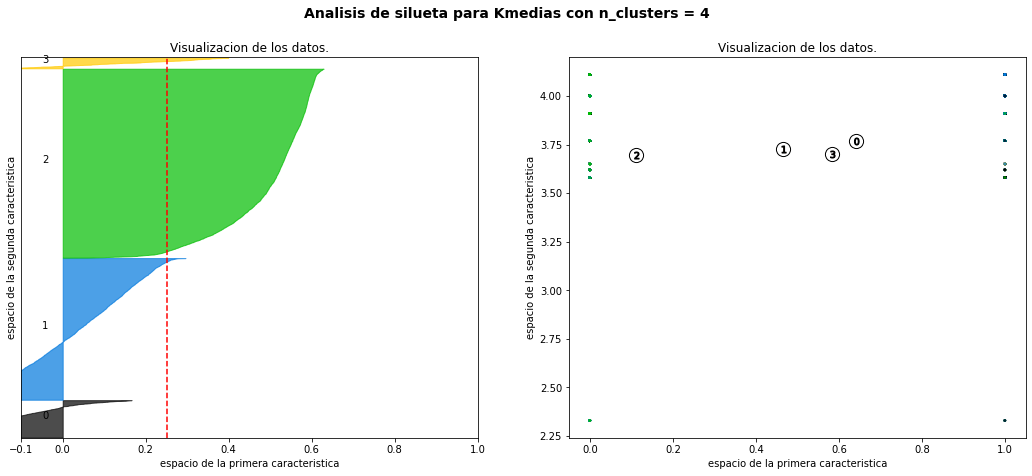

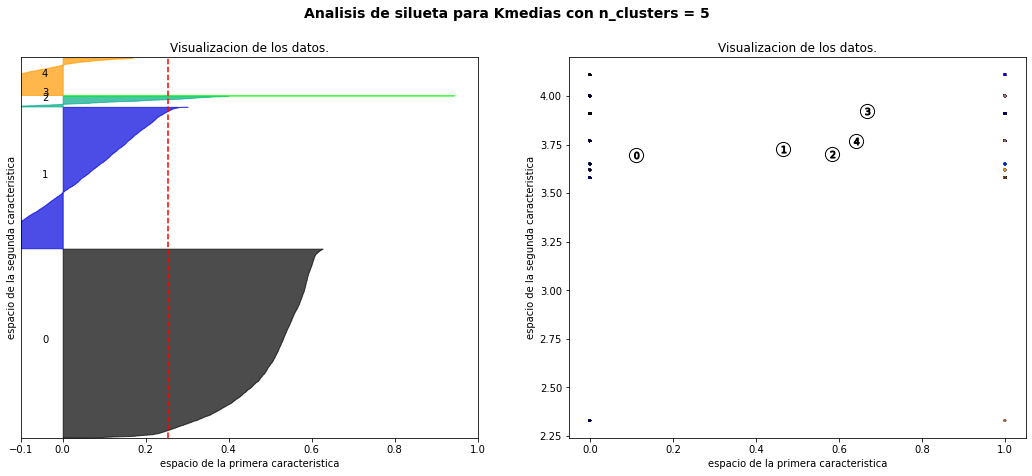

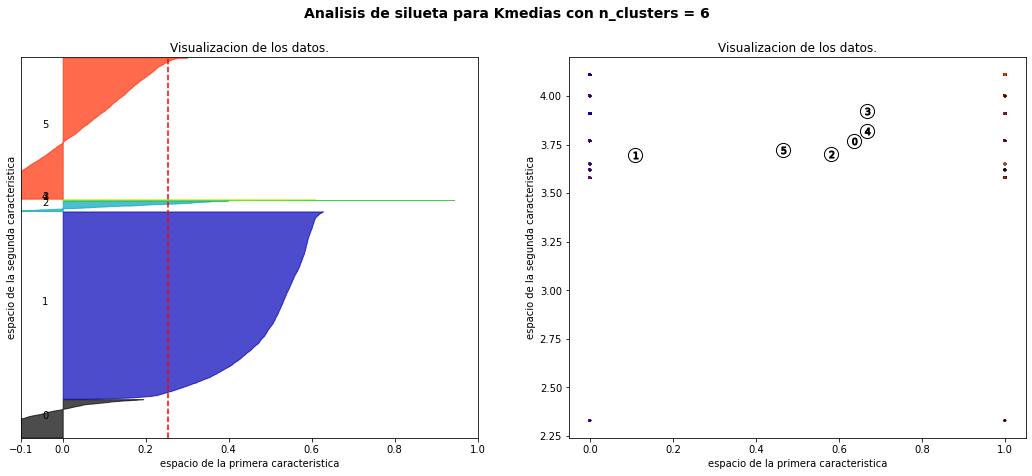

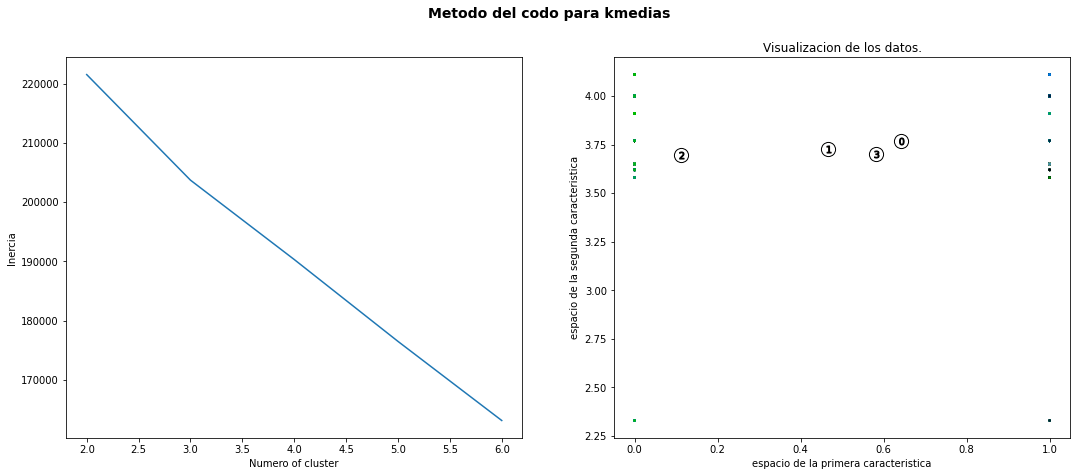

In [42]:
# con DF- PCA
X = df_final.drop(columns = [dni]).values

range_nC_clusters = [2,3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
    
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("espacio de la primera caracteristica")
ax2.set_ylabel("espacio de la segunda caracteristica")

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()

#### SOBRE DF ORGINAL (SIN PCA)

In [43]:
# Número de clusters buscado
n_clust = 6

km = KMeans(n_clusters=n_clust)
km.fit(df.drop(columns = [dni])) 

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster(Inertia) ', km.inertia_)

Suma de los cuadrados de las distancias al cluster(Inertia)  142338466039.8499


In [44]:
X = df.drop(columns = [dni]).values
print('Coeficiente de silueta =', silhouette_score(X, cluster_labels))

Coeficiente de silueta = 0.2208318031128754


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

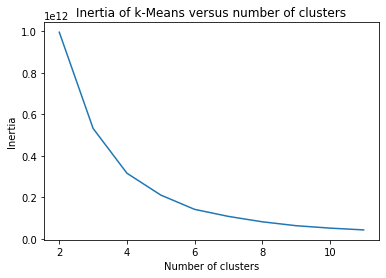

In [46]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df.drop(columns = [dni])).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [47]:
df_clusters=df.copy()
df_clusters['cluster_kmeans'] = km.labels_ #clusters
df_clusters.cluster_kmeans.value_counts()

2    6272
0    2001
4    1166
1     515
3     146
5      28
Name: cluster_kmeans, dtype: int64

In [48]:
pd.options.display.max_columns = None
df_clusters.groupby(by= 'cluster_kmeans').describe()

client_antig                                              \
                      count        mean        std   min     25%    50%   
cluster_kmeans                                                            
0                    2001.0  104.837581  78.615851   0.0   38.00   91.0   
1                     515.0  131.757282  80.304269   0.0   63.00  120.0   
2                    6272.0   96.418048  77.519502   0.0   36.00   77.0   
3                     146.0  131.876712  82.554717   8.0   63.25  117.5   
4                    1166.0  115.796741  78.965048   0.0   51.25  101.0   
5                      28.0  190.071429  85.202125  28.0  129.00  196.5   

                              trans__x0_AV                                     \
                   75%    max        count      mean       std  min  25%  50%   
cluster_kmeans                                                                  
0               154.00  391.0       2001.0  0.155422  0.365146  0.0  0.0  0.0   
1               188.50  292.0        515.0  0.159223  0.371514  0.0  0.0  0.0   
2               142.00  392.0       6272.0  0.049745  0.218897  0.0  0.0  0.0   
3               195.50  309.0        146.0  0.136986  0.345016  0.0  0.0  0.0   
4               172.00  387.0       1166.0  0.151801  0.358982  0.0  0.0  0.0   
5               251.75  308.0         28.0  0.178571  0.390021  0.0  0.0  0.0   

                         trans__x0_AX                                          \
                75%  max        count      mean       std  min  25%  50%  75%   
cluster_kmeans                                                                  
0               0.0  2.0       2001.0  0.000500  0.022355  0.0  0.0  0.0  0.0   
1               0.0  2.0        515.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
2               0.0  2.0       6272.0  0.000159  0.012627  0.0  0.0  0.0  0.0   
3               0.0  1.0        146.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
4               0.0  1.0       1166.0  0.000858  0.029285  0.0  0.0  0.0  0.0   
5               0.0  1.0         28.0  0.000000  0.000000  0.0  0.0  0.0  0.0   

                    trans__x0_EX                                               \
                max        count      mean       std  min  25%  50%  75%  max   
cluster_kmeans                                                                  
0               1.0       2001.0  0.020490  0.342169  0.0  0.0  0.0  0.0  9.0   
1               0.0        515.0  0.013592  0.267954  0.0  0.0  0.0  0.0  6.0   
2               1.0       6272.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3               0.0        146.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
4               1.0       1166.0  0.010292  0.241377  0.0  0.0  0.0  0.0  8.0   
5               0.0         28.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

               trans__x0_MC                                               \
                      count      mean       std  min  25%  50%  75%  max   
cluster_kmeans                                                             
0                    2001.0  0.028986  0.401447  0.0  0.0  0.0  0.0  9.0   
1                     515.0  0.027184  0.223256  0.0  0.0  0.0  0.0  3.0   
2                    6272.0  0.009726  0.163874  0.0  0.0  0.0  0.0  7.0   
3                     146.0  0.082192  0.398391  0.0  0.0  0.0  0.0  3.0   
4                    1166.0  0.020583  0.188752  0.0  0.0  0.0  0.0  4.0   
5                      28.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

               trans__x0_PC                                               \
                      count      mean       std  min  25%  50%  75%  max   
cluster_kmeans                                                             
0                    2001.0  0.193403  0.557742  0.0  0.0  0.0  0.0  3.0   
1                     515.0  0.353398  0.796004  0.0  0.0  0.0  0.0  4.0   
2                    6272.0  0.016422  0.161375  0.0  0.0  0.0  0.0  3.0   
3       

Para n_clusters = 2 El silhouette_score promedio es : 0.7554408550997662
Para n_clusters = 3 El silhouette_score promedio es : 0.7180576315345093
Para n_clusters = 4 El silhouette_score promedio es : 0.7139176304182022
Para n_clusters = 5 El silhouette_score promedio es : 0.6942315015389272
Para n_clusters = 6 El silhouette_score promedio es : 0.6897912344849645


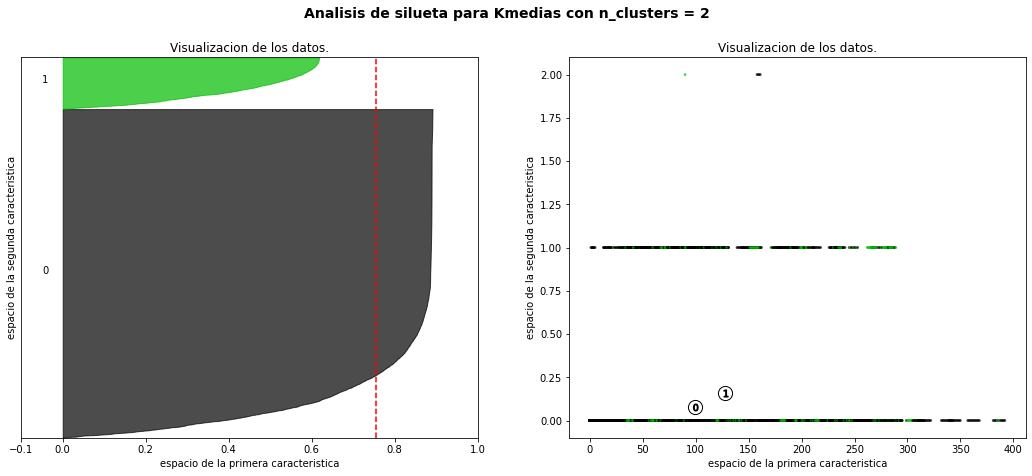

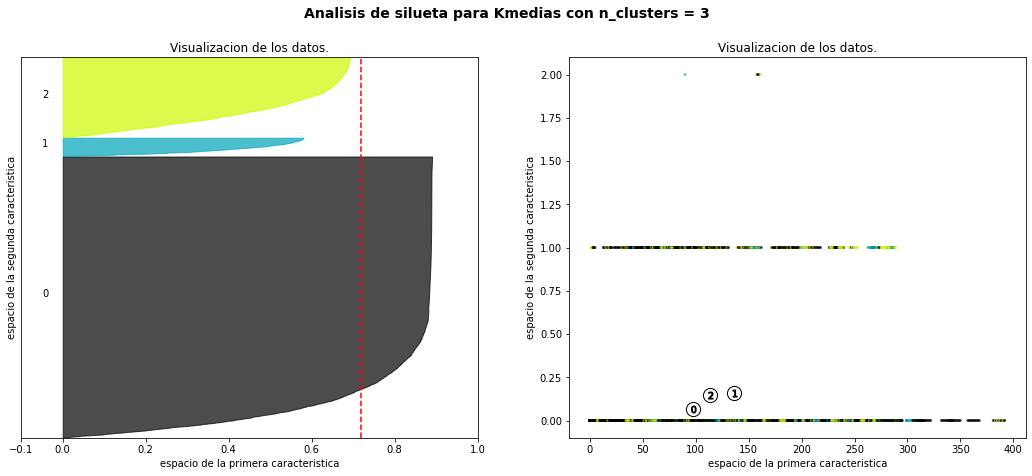

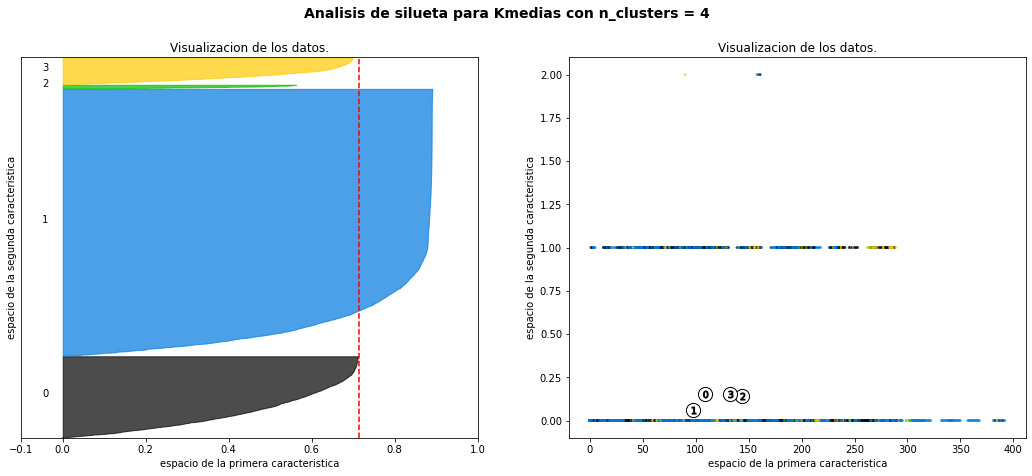

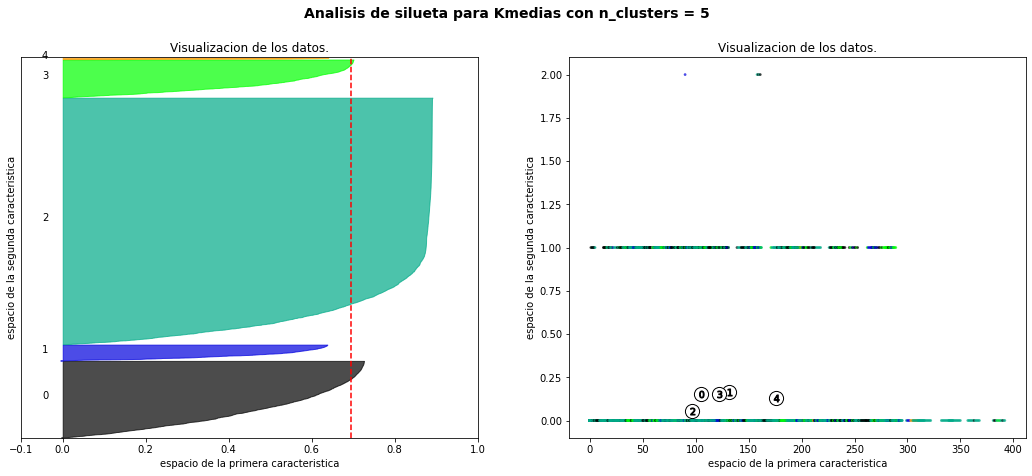

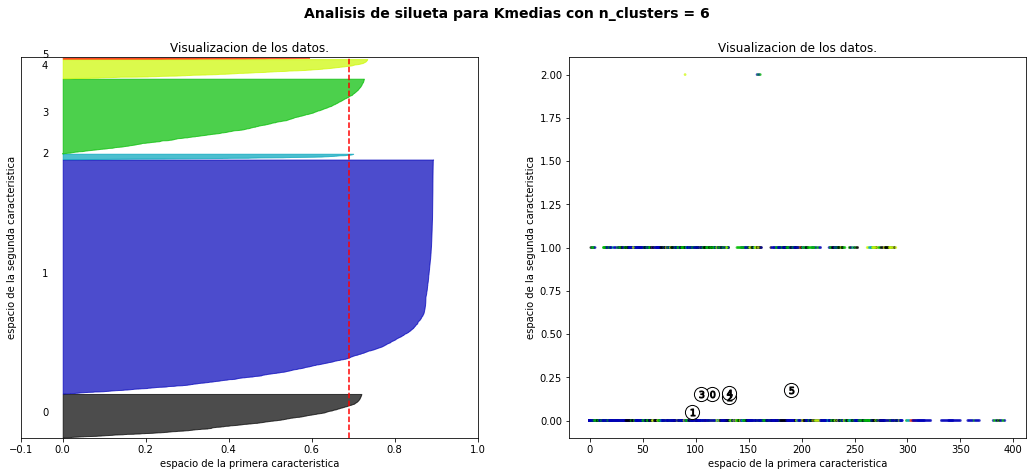

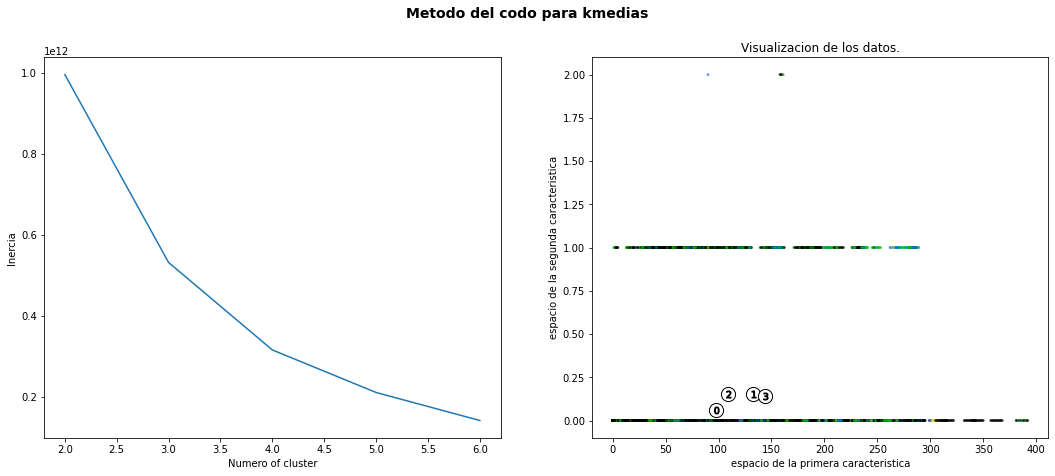

In [41]:
# con DF sin PCA
X = df.drop(columns = [dni]).values

range_nC_clusters = [2,3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
    
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("espacio de la primera caracteristica")
ax2.set_ylabel("espacio de la segunda caracteristica")

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()

### HDBScan Clustering

In [ ]:
HDBScan Clustering.
Este algoritmo es de clusterización apropiado para detectar anomalias (outliers).
* comparar los clusters con los del punto anterior usando silhouette Analisys

### K-Means Clustering para Serires Temporales (Lucho)

K-Means Clustering para Serires Temporales (Lucho)
La idea es segmentar a los clientes en base a sus series temporales
usando el monto y la fecha del monto de moviento.
* Usar la libreria [ts-learn](https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_kmeans.html) 


> Agregar al dataset el cluster resultante de los modelos.

La serie temporal se escala usando TimeSeriesScalerMeanVariance. Este scaler provoca que la salida de cada serie temporal tenga media 0 y varianza unitaria. Aqui asumimos que el rango de la serie temporal no aporta informacion y solo queremos comparar las distintas formas independientemente de la variacion de amplitud entre ellas.